Here I will do all the checking and plotting associated with the linkage mapping using the 9 R. temporaria families

I will make three maps, which correspond to the 3 different enzymes used

PstI - 2 families  
EcoRI - 1 family  
SbfI - 6 families



### PstI map

I made the map, with two families in LepMap. Details are in [evernote](https://www.evernote.com/shard/s175/nl/19472134/5b3aee54-6fd3-4ef6-9fcf-387eb270a14c?title=R_temp%20linkage%20map)

A problem that I was having previously was that female maps showed a lot of markers in the middle of the chromosomes which shared the same position. This is expected for males, due to their lack of recombination in the centre of chromosomes, but not for females. The reason is that, if a marker is not informative for one sex, the position of that marker is inferred from the map of the other sex.

The way to circumvent this is to make the map using only female-informative markers. This results in fewer markers in the map, but hopefully more robust marker orders. I did this for the PstI map, so now I want to check the distribution of markers along the linkage map, and see if there is still a peak. . . . 


In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [1]:
map_file = open("/home/djeffrie/Data/RADseq/R_temp_fams/NEW/PstI_map/map_9.5_ordered_1_infMask_23.txt", 'r').readlines()

In [9]:
## define function to get male and female positions from LepMap output

def Pos_finder(infile_path):

    map_file = open(infile_path, 'r').readlines()
    
    
    male_positions = {}
    female_positions = {}

    for line in map_file:
        if line.startswith("#***"):
            LG = line.split()[3]
            if LG not in male_positions:
                male_positions[LG] = []
            if LG not in female_positions:
                female_positions[LG] = []
        if not line.startswith("#"):
            marker_ID = line.split()[0]

            male_pos = float(line.split()[1])
            male_positions[LG].append(male_pos)

            female_pos = float(line.split()[2])
            female_positions[LG].append(female_pos)
        
    return male_positions, female_positions
        

In [10]:
male_marker_positions, female_marker_positions  =  Pos_finder("/home/djeffrie/Data/RADseq/R_temp_fams/NEW/PstI_map/map_9.5_ordered_1_infMask_23.txt")

In [11]:
male_marker_positions

{'1': [0.0,
  0.0,
  15.51,
  15.51,
  21.28,
  21.28,
  21.28,
  21.28,
  21.28,
  21.28,
  21.28,
  21.28,
  21.28,
  21.28,
  21.28,
  21.28,
  24.41,
  24.41,
  24.41,
  24.41,
  26.26,
  26.26,
  26.26,
  26.26,
  26.26,
  27.49,
  27.49,
  27.49,
  27.49,
  27.49,
  27.49,
  27.49,
  27.49,
  28.1,
  28.1,
  28.1,
  28.1,
  29.95,
  29.95,
  29.95,
  29.95,
  30.56,
  30.56,
  30.56,
  30.56,
  30.56,
  30.56,
  30.56,
  30.56,
  30.56,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31.17,
  31

### Now plot a histogra of marker distribution 

In [29]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype=u'bar', align=u'mid', orientation=u'vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency 

In [32]:
int(np.round(max(male_marker_positions["%s" % LG])))

86

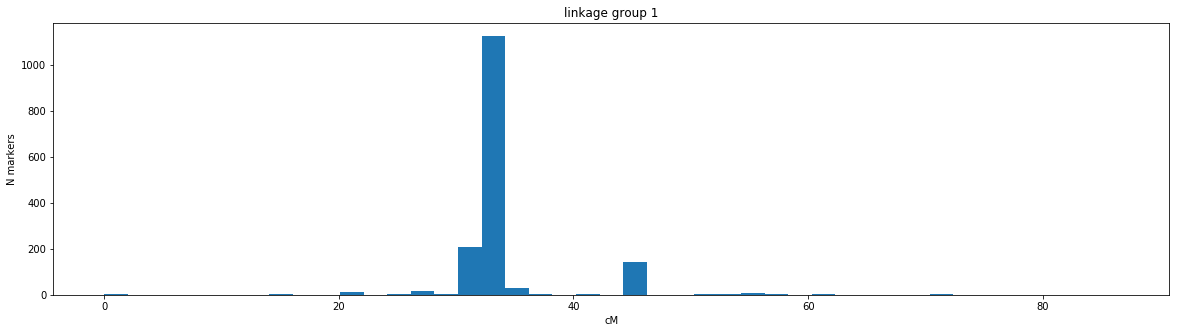

In [66]:
LG= "1"

fig = plt.figure(figsize=(20,5))

plt.hist(male_marker_positions["%s" % LG],bins= int(np.round(max(male_marker_positions["%s" % LG])/2)))
plt.title("linkage group %s" % LG)
plt.ylabel("N markers")
plt.xlabel("cM")
plt.show()

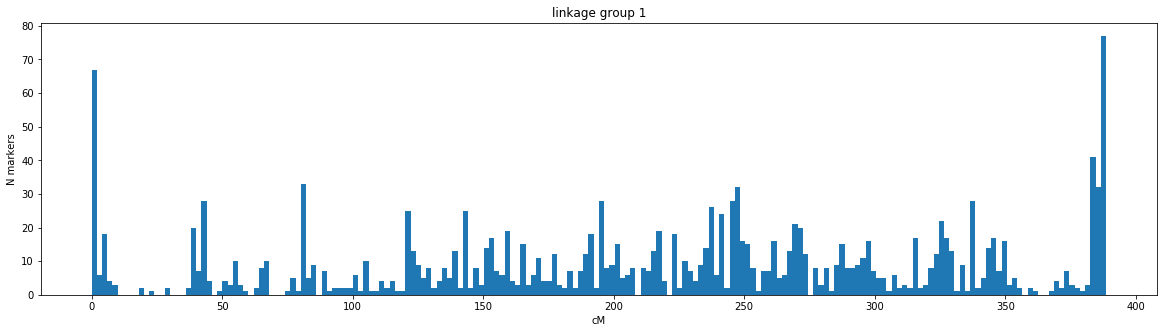

In [67]:
LG= "1"

fig = plt.figure(figsize=(20,5))

plt.hist(female_marker_positions["%s" % LG],bins= int(np.round(max(female_marker_positions["%s" % LG])/2)))
plt.title("linkage group %s" % LG)
plt.ylabel("N markers")
plt.xlabel("cM")
plt.show()

So, when checking the linkage maps (one by one above because I am feeling lazy) there are still some peaks in several of the linkage groups in the female. So now two maps from different families and RAD protocols have told me that there are marker peaks in female maps . . . so maybe it is not an artifact, perhaps it is centromeres or something. 

So now I will continue with the SbfI maps and the EcoRI maps. Eventually I can compare the linkage groups across maps and see if this peak issue is consistent among maps. 